<a href="https://colab.research.google.com/github/khushi3502/Projects/blob/main/product_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
import pandas as pd

# Load the Excel file into a pandas dataframe
data = pd.read_excel('/content/data.xlsx')

# Convert the dataframe to a CSV file
data.to_csv('output_file.csv', index=False)


In [ ]:
# Load data
data = pd.read_excel('/content/data.xlsx')

In [ ]:
data.shape

(334, 10)

In [ ]:
data.fillna(5)

,Unit,Price,ID,wt,OD,Surcharge,dimension,kg,Energy,deliver
0,"ID12,7_WT1,35_OD15,4",143.8255,12.70,1.35,15.40,0.08,2.70,0.466197,0.0,1
1,"ID15,88_WT1,3_OD18,48",166.1555,15.88,1.30,18.48,0.08,2.60,0.549000,0.0,1
2,"ID15,88_WT1,52_OD18,92",191.0230,15.88,1.52,18.92,0.08,3.04,0.650004,0.0,1
3,"ID25,4_WT1,77_OD28,94",298.1055,25.40,1.77,28.94,0.08,3.54,1.183014,0.0,1
4,"ID38,1_WT2,67_OD43,44",671.5240,38.10,2.67,43.44,0.08,5.34,2.677005,0.0,1
...,...,...,...,...,...,...,...,...,...,...
329,"ID25,4_WT2,46_OD30,32",392.9304,25.40,2.46,30.32,0.08,4.92,1.690000,0.0,0
330,"ID25,4_WT2,53_OD30,46",405.3635,25.40,2.53,30.46,0.08,5.06,1.739988,0.0,0
331,"ID63,5_WT3,18_OD69,86",1179.2659,63.50,3.18,69.86,0.08,6.36,5.210000,0.0,0
332,"ID63,5_WT4,45_OD72,4",1680.6602,63.50,4.45,72.40,0.08,8.90,7.440009,0.0,0


In [ ]:
data.fillna(method ='pad')

,Unit,Price,ID,wt,OD,Surcharge,dimension,kg,Energy,deliver
0,"ID12,7_WT1,35_OD15,4",143.8255,12.70,1.35,15.40,0.08,2.70,0.466197,0.0,1
1,"ID15,88_WT1,3_OD18,48",166.1555,15.88,1.30,18.48,0.08,2.60,0.549000,0.0,1
2,"ID15,88_WT1,52_OD18,92",191.0230,15.88,1.52,18.92,0.08,3.04,0.650004,0.0,1
3,"ID25,4_WT1,77_OD28,94",298.1055,25.40,1.77,28.94,0.08,3.54,1.183014,0.0,1
4,"ID38,1_WT2,67_OD43,44",671.5240,38.10,2.67,43.44,0.08,5.34,2.677005,0.0,1
...,...,...,...,...,...,...,...,...,...,...
329,"ID25,4_WT2,46_OD30,32",392.9304,25.40,2.46,30.32,0.08,4.92,1.690000,0.0,0
330,"ID25,4_WT2,53_OD30,46",405.3635,25.40,2.53,30.46,0.08,5.06,1.739988,0.0,0
331,"ID63,5_WT3,18_OD69,86",1179.2659,63.50,3.18,69.86,0.08,6.36,5.210000,0.0,0
332,"ID63,5_WT4,45_OD72,4",1680.6602,63.50,4.45,72.40,0.08,8.90,7.440009,0.0,0


In [ ]:
data.isnull()

,Unit,Price,ID,wt,OD,Surcharge,dimension,kg,Energy,deliver
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
329,False,False,False,False,False,False,False,False,False,False
330,False,False,False,False,False,False,False,False,False,False
331,False,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = data.drop('Unit', axis=1)
y = data['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create Gradient Boosting model and fit to training data
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Make predictions on test data and evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Mean Squared Error:  219497.55744405504
R-squared:  0.7470679792018399


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


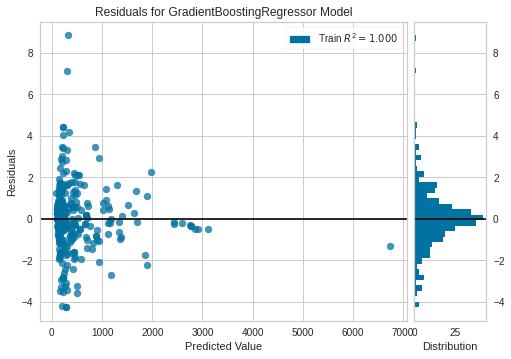

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Assuming 'df' is the dataframe containing the data
X = data.drop('Unit', axis=1)
y = data['Price']

gb = GradientBoostingRegressor()
gb.fit(X, y)

# Create residual plot
visualizer = ResidualsPlot(gb)
visualizer.fit(X, y)
visualizer.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

sns.set()

In [ ]:
# Load data
data = pd.read_excel('/content/data.xlsx')

In [ ]:
data.shape

(334, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unit       334 non-null    object 
 1   Price      334 non-null    float64
 2   ID         334 non-null    float64
 3   wt         334 non-null    float64
 4   OD         334 non-null    float64
 5   Surcharge  334 non-null    float64
 6   dimension  334 non-null    float64
 7   kg         334 non-null    float64
 8   Energy     334 non-null    float64
 9   deliver    334 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 26.2+ KB


In [ ]:
data.describe(include='all')

,Unit,Price,ID,wt,OD,Surcharge,dimension,kg,Energy,deliver
count,334,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
unique,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"ID12,7_WT1,21_OD15,12",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,439.960688,24.555060,2.078353,28.711766,0.042096,4.156707,1.787470,0.009629,1.284431
std,NaN,627.355497,14.835753,1.331286,17.020131,0.027691,2.662572,2.800084,0.019250,0.910366
min,NaN,87.696000,9.500000,1.000000,11.900000,0.000000,2.000000,0.316008,0.000000,0.000000
25%,NaN,143.825500,12.700000,1.300000,16.860000,0.020000,2.600000,0.466004,0.000000,1.000000
50%,NaN,219.240000,19.050000,1.680000,21.730000,0.040000,3.360000,0.851997,0.000000,1.000000
75%,NaN,446.894250,30.162500,2.460000,34.742500,0.050000,4.920000,1.882997,0.000000,2.000000


In [ ]:
data.isna().sum()

Unit         0
Price        0
ID           0
wt           0
OD           0
Surcharge    0
dimension    0
kg           0
Energy       0
deliver      0
dtype: int64

In [ ]:
data.duplicated().any()

True

In [ ]:
data.apply(lambda x: len(x.unique()))

Unit         102
Price        293
ID            14
wt            81
OD           102
Surcharge     14
dimension     95
kg           276
Energy         2
deliver        5
dtype: int64

In [ ]:
cat_cols = data.select_dtypes(exclude='number').columns.to_list()
num_cols = data.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Unit']
Numerical Columns:  ['Price', 'ID', 'wt', 'OD', 'Surcharge', 'dimension', 'kg', 'Energy', 'deliver']


In [ ]:
for col in cat_cols:
    print('-----------------------------')
    print('Series: ', col)
    print('-----------------------------')
    print(data[col].value_counts())
    print('\n')

-----------------------------
Series:  Unit
-----------------------------
ID12,7_WT1,21_OD15,12     23
ID12,7_WT1_OD14,7         20
ID15,88_WT1,3_OD18,48     15
ID12,7_WT1,35_OD15,4      13
ID15,88_WT1,1_OD18,08     13
                          ..
ID31,75_WT1,85_OD35,45     1
ID31,75_WT4,85_OD41,45     1
ID25,4_WT4,54_OD34,48      1
ID12,7_WT2,09_OD16,88      1
ID63,5_WT4,58_OD72,66      1
Name: Unit, Length: 102, dtype: int64




In [ ]:
clean_data = data.copy()


In [ ]:
new_col_names = [col.lower() for col in clean_data.columns]
clean_data.columns = new_col_names

print(clean_data.columns)

Index(['unit', 'price', 'id', 'wt', 'od', 'surcharge', 'dimension', 'kg',
       'energy', 'deliver'],
      dtype='object')


In [ ]:
clean_data.head()

,unit,price,id,wt,od,surcharge,dimension,kg,energy,deliver
0,"ID12,7_WT1,35_OD15,4",143.8255,12.70,1.35,15.40,0.08,2.70,0.466197,0.0,1
1,"ID15,88_WT1,3_OD18,48",166.1555,15.88,1.30,18.48,0.08,2.60,0.549000,0.0,1
2,"ID15,88_WT1,52_OD18,92",191.0230,15.88,1.52,18.92,0.08,3.04,0.650004,0.0,1
3,"ID25,4_WT1,77_OD28,94",298.1055,25.40,1.77,28.94,0.08,3.54,1.183014,0.0,1
4,"ID38,1_WT2,67_OD43,44",671.5240,38.10,2.67,43.44,0.08,5.34,2.677005,0.0,1


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'id'}>, <Axes: title={'center': 'wt'}>],
       [<Axes: title={'center': 'od'}>,
        <Axes: title={'center': 'surcharge'}>,
        <Axes: title={'center': 'dimension'}>],
       [<Axes: title={'center': 'kg'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'deliver'}>]], dtype=object)

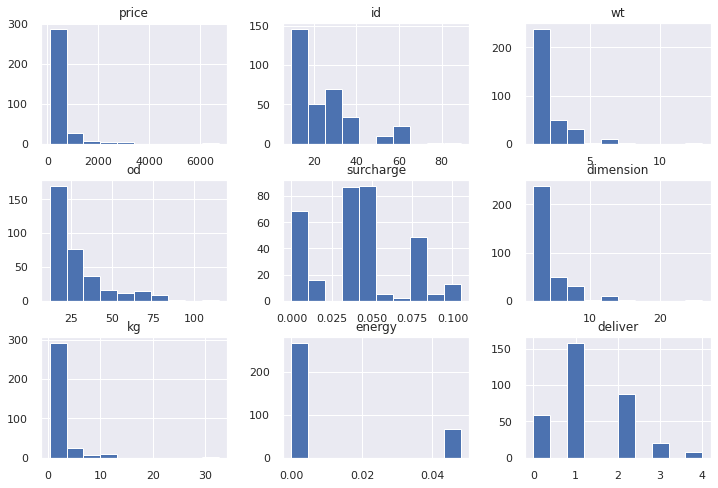

In [ ]:
clean_data.hist(figsize=(12,8))

In [ ]:
corr_matrix = clean_data.corr()
corr_matrix['price'].sort_values(ascending=False)

price        1.000000
kg           0.992948
wt           0.941492
dimension    0.941492
od           0.883100
id           0.844156
deliver      0.156540
energy       0.068615
surcharge   -0.010554
Name: price, dtype: float64

<Axes: >

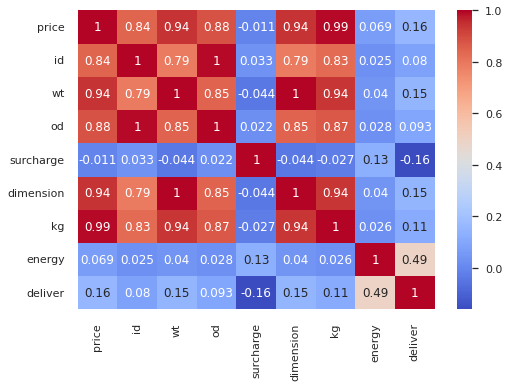

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='id', ylabel='price'>

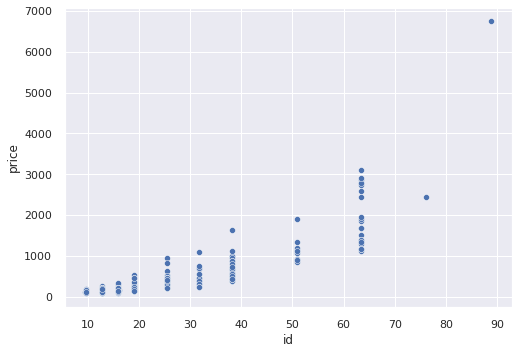

In [ ]:
sns.scatterplot(data=clean_data, x='id', y='price')

In [ ]:
X = data.drop('Unit', axis=1)
y = data['Price']

In [ ]:
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [ ]:
def train_and_evaluate_model(model_name, model, X, y):
    '''
    Create a training pipeline to scale and train the model
    using the input data, then evaluate the model and safe its error
    and score in the scores dataframe.
    '''
    # split the data
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # create a training pipeline
    pipeline = make_pipeline(StandardScaler(), model)
    
    # apply scaling on training data and train the model
    pipeline.fit(X_train, y_train)
    
    # predict the validation set
    y_hat = pipeline.predict(X_validate)
    
    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_validate, y_hat))
    model_score = r2_score(y_validate, y_hat)
    
    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]
    
    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)

In [ ]:
# linear regression
linear_regression_model = LinearRegression()
train_and_evaluate_model('Linear Regression', linear_regression_model, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  3.1429268358504953e-13
R2 Score:  1.0


In [ ]:
ridge_model = Ridge()
train_and_evaluate_model('Ridge', ridge_model, X, y)

----------------------------------
Ridge  Report:
----------------------------------
RMSE:  22.473179432999004
R2 Score:  0.9994180265655257


In [ ]:
lasso_model = Lasso()
train_and_evaluate_model('Lasso', lasso_model, X, y)

----------------------------------
Lasso  Report:
----------------------------------
RMSE:  1.8289397059585686
R2 Score:  0.9999961454569637


In [ ]:
svr_model = SVR()
train_and_evaluate_model('SVM', svr_model, X, y)

----------------------------------
SVM  Report:
----------------------------------
RMSE:  983.7516326669394
R2 Score:  -0.11518021121271271


In [ ]:
# decision tree
dtr_model = DecisionTreeRegressor()
train_and_evaluate_model('Decision Tree', dtr_model, X, y)

----------------------------------
Decision Tree  Report:
----------------------------------
RMSE:  463.5026174947145
R2 Score:  0.7524411229067773


In [ ]:
# random forest
rfr_model = RandomForestRegressor()
train_and_evaluate_model('Random Forest', rfr_model, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  491.81915791116126
R2 Score:  0.721269171448355


In [ ]:
# xgboost
xgbr_model = XGBRegressor()
train_and_evaluate_model('XGBoost', xgbr_model, X, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  445.2534434999793
R2 Score:  0.771551297479684


In [ ]:
model_scores

,model,rmse,r2_score
0,Linear Regression,3.142927e-13,1.000000
1,Ridge,2.247318e+01,0.999418
2,Lasso,1.828940e+00,0.999996
3,SVM,9.837516e+02,-0.115180
4,Decision Tree,4.635026e+02,0.752441
5,Random Forest,4.918192e+02,0.721269
6,XGBoost,4.452534e+02,0.771551


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset into a pandas DataFrame
data = pd.read_excel('/content/data.xlsx')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 267
Testing data size: 67
